In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

<AxesSubplot:ylabel='Density'>

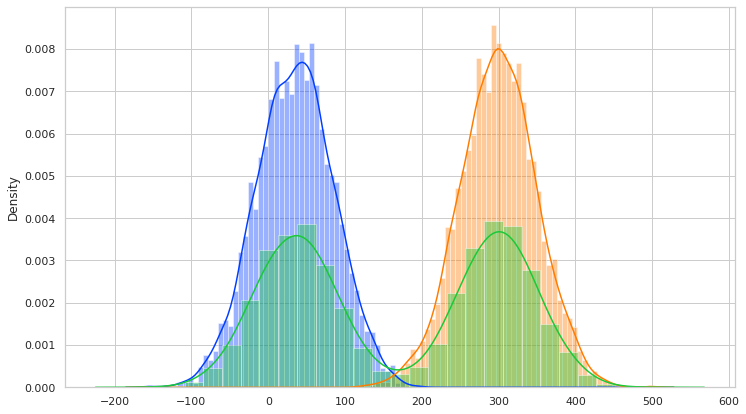

In [2]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
#value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = value1
value1 = np.random.normal(loc=300,scale=50,size=5000)
#value2 =  np.random.normal(loc=35,scale=20,size=10000)
q2 = value1
q = np.concatenate([q1,q2])
q1[-1] = q.max()
q2[-1] = q.min()
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)
sns.distplot(q)

C1 [  7 301 643  48   0   0   0   0   0   1]
E1: [-59.25169736 -16.7704262   25.71084496  68.19211612 110.67338728
 153.15465845 195.63592961 238.11720077 280.59847193 323.07974309
 365.56101425]
C2: [  1   0   0   0   0   0   1 170 713 115]
E2: [-59.25169736 -16.7704262   25.71084496  68.19211612 110.67338728
 153.15465845 195.63592961 238.11720077 280.59847193 323.07974309
 365.56101425]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[  7 301 643  48   0   0   1 170 713 115]]
JACC: [[0.14285714 0.         0.         0.                nan        nan
  0.         0.         0.         0.00869565]]
JMEAN: 0.018944099378881987


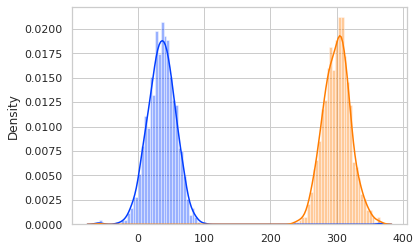

C1 [102 589 296  12   0   0   0   0   0   1]
E1: [ -3.31339564  31.1076412   65.52867804  99.94971488 134.37075172
 168.79178856 203.2128254  237.63386224 272.05489908 306.47593592
 340.89697276]
C2: [  1   0   0   0   0   1  20 303 577  98]
E2: [ -3.31339564  31.1076412   65.52867804  99.94971488 134.37075172
 168.79178856 203.2128254  237.63386224 272.05489908 306.47593592
 340.89697276]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[102 589 296  12   0   1  20 303 577  98]]
JACC: [[0.00980392 0.         0.         0.                nan 0.
  0.         0.         0.         0.01020408]]
JMEAN: 0.0022231114668089455


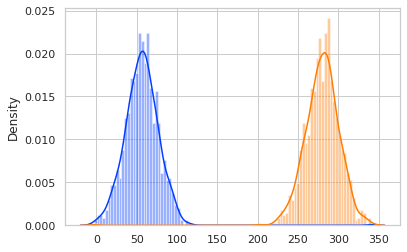

C1 [ 55 431 448  64   1   0   0   0   0   1]
E1: [ 11.58979614  42.5168769   73.44395766 104.37103842 135.29811918
 166.22519993 197.15228069 228.07936145 259.00644221 289.93352297
 320.86060373]
C2: [  1   0   0   0   0   0  57 425 450  67]
E2: [ 11.58979614  42.5168769   73.44395766 104.37103842 135.29811918
 166.22519993 197.15228069 228.07936145 259.00644221 289.93352297
 320.86060373]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 55 431 448  64   1   0  57 425 450  67]]
JACC: [[0.01818182 0.         0.         0.         0.                nan
  0.         0.         0.         0.01492537]]
JMEAN: 0.0036785768129051714


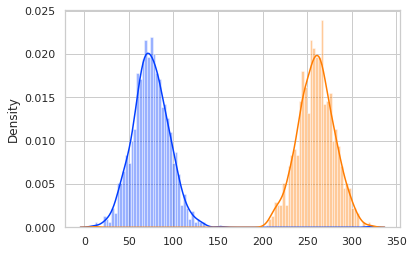

C1 [ 87 381 416 113   2   0   0   0   0   1]
E1: [ 40.73074725  66.85058585  92.97042446 119.09026306 145.21010166
 171.32994026 197.44977887 223.56961747 249.68945607 275.80929468
 301.92913328]
C2: [  1   0   0   0   1  23 186 472 285  32]
E2: [ 40.73074725  66.85058585  92.97042446 119.09026306 145.21010166
 171.32994026 197.44977887 223.56961747 249.68945607 275.80929468
 301.92913328]
INTERSECT: [[1 0 0 0 1 0 0 0 0 1]]
UNION: [[ 87 381 416 113   2  23 186 472 285  32]]
JACC: [[0.01149425 0.         0.         0.         0.5        0.
  0.         0.         0.         0.03125   ]]
JMEAN: 0.05427442528735632


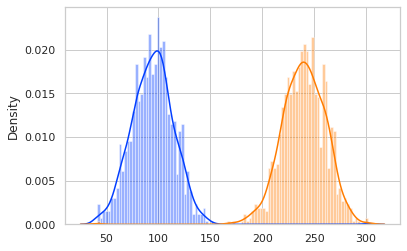

C1 [ 39 195 450 254  57   4   0   0   0   1]
E1: [ 54.08951252  77.22549097 100.36146942 123.49744787 146.63342633
 169.76940478 192.90538323 216.04136168 239.17734014 262.31331859
 285.44929704]
C2: [  1   0   0   0   5  77 365 372 155  25]
E2: [ 54.08951252  77.22549097 100.36146942 123.49744787 146.63342633
 169.76940478 192.90538323 216.04136168 239.17734014 262.31331859
 285.44929704]
INTERSECT: [[1 0 0 0 5 4 0 0 0 1]]
UNION: [[ 39 195 450 254  57  77 365 372 155  25]]
JACC: [[0.02564103 0.         0.         0.         0.0877193  0.05194805
  0.         0.         0.         0.04      ]]
JMEAN: 0.020530837583469165


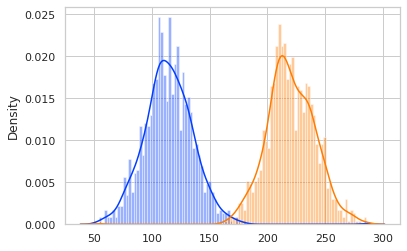

C1 [ 17  85 289 331 222  51   4   0   0   1]
E1: [ 69.98616057  89.22338563 108.46061068 127.69783573 146.93506078
 166.17228584 185.40951089 204.64673594 223.883961   243.12118605
 262.3584111 ]
C2: [  1   0   0   1  45 175 356 302 103  17]
E2: [ 69.98616057  89.22338563 108.46061068 127.69783573 146.93506078
 166.17228584 185.40951089 204.64673594 223.883961   243.12118605
 262.3584111 ]
INTERSECT: [[ 1  0  0  1 45 51  4  0  0  1]]
UNION: [[ 17  85 289 331 222 175 356 302 103  17]]
JACC: [[0.05882353 0.         0.         0.00302115 0.2027027  0.29142857
  0.01123596 0.         0.         0.05882353]]
JMEAN: 0.06260354360472371


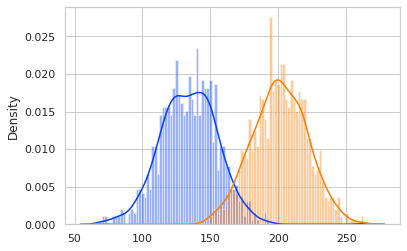

C1 [ 10  37 106 234 269 222  87  29   4   2]
E1: [ 92.11228536 106.23978306 120.36728077 134.49477847 148.62227618
 162.74977389 176.87727159 191.0047693  205.132267   219.25976471
 233.38726241]
C2: [  1   1  15  40 140 247 264 176  90  26]
E2: [ 92.11228536 106.23978306 120.36728077 134.49477847 148.62227618
 162.74977389 176.87727159 191.0047693  205.132267   219.25976471
 233.38726241]
INTERSECT: [[  1   1  15  40 140 222  87  29   4   2]]
UNION: [[ 10  37 106 234 269 247 264 176  90  26]]
JACC: [[0.1        0.02702703 0.14150943 0.17094017 0.5204461  0.89878543
  0.32954545 0.16477273 0.04444444 0.07692308]]
JMEAN: 0.2474393856870655


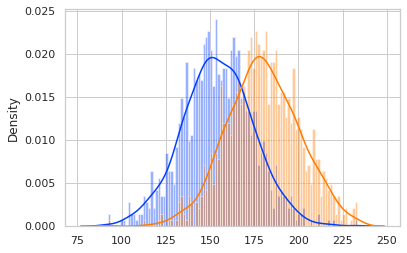

C1 [  3   8  22  78 186 289 230 131  42  11]
E1: [ 94.85030625 108.9813363  123.11236635 137.2433964  151.37442645
 165.50545649 179.63648654 193.76751659 207.89854664 222.02957669
 236.16060674]
C2: [  3  31 101 219 254 232 117  37   3   3]
E2: [ 94.85030625 108.9813363  123.11236635 137.2433964  151.37442645
 165.50545649 179.63648654 193.76751659 207.89854664 222.02957669
 236.16060674]
INTERSECT: [[  3   8  22  78 186 232 117  37   3   3]]
UNION: [[  3  31 101 219 254 289 230 131  42  11]]
JACC: [[1.         0.25806452 0.21782178 0.35616438 0.73228346 0.80276817
  0.50869565 0.28244275 0.07142857 0.27272727]]
JMEAN: 0.4502396556947148


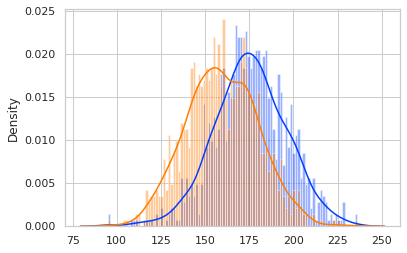

C1 [  1   0   1   9  40 207 344 260 108  30]
E1: [ 72.02269711  90.29648184 108.57026657 126.8440513  145.11783602
 163.39162075 181.66540548 199.93919021 218.21297493 236.48675966
 254.76054439]
C2: [ 13  59 166 353 289 102  15   2   0   1]
E2: [ 72.02269711  90.29648184 108.57026657 126.8440513  145.11783602
 163.39162075 181.66540548 199.93919021 218.21297493 236.48675966
 254.76054439]
INTERSECT: [[  1   0   1   9  40 102  15   2   0   1]]
UNION: [[ 13  59 166 353 289 207 344 260 108  30]]
JACC: [[0.07692308 0.         0.0060241  0.02549575 0.1384083  0.49275362
  0.04360465 0.00769231 0.         0.03333333]]
JMEAN: 0.0824235143891942


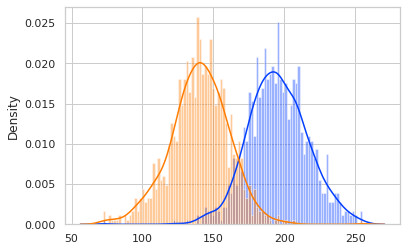

C1 [  1   0   0   0   3  74 320 429 154  19]
E1: [ 44.63099915  68.37356354  92.11612793 115.85869232 139.60125671
 163.3438211  187.08638549 210.82894987 234.57151426 258.31407865
 282.05664304]
C2: [  7  77 333 417 146  18   1   0   0   1]
E2: [ 44.63099915  68.37356354  92.11612793 115.85869232 139.60125671
 163.3438211  187.08638549 210.82894987 234.57151426 258.31407865
 282.05664304]
INTERSECT: [[ 1  0  0  0  3 18  1  0  0  1]]
UNION: [[  7  77 333 417 146  74 320 429 154  19]]
JACC: [[0.14285714 0.         0.         0.         0.02054795 0.24324324
  0.003125   0.         0.         0.05263158]]
JMEAN: 0.0462404910253234


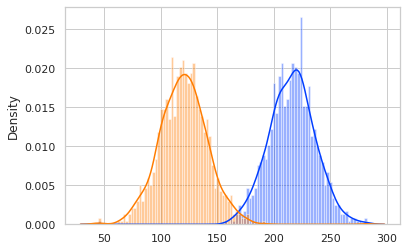

C1 [  1   0   0   0   0  20 233 469 252  25]
E1: [ 32.90590662  59.87576056  86.8456145  113.81546844 140.78532238
 167.75517632 194.72503026 221.6948842  248.66473814 275.63459208
 302.60444602]
C2: [ 29 248 482 223  17   0   0   0   0   1]
E2: [ 32.90590662  59.87576056  86.8456145  113.81546844 140.78532238
 167.75517632 194.72503026 221.6948842  248.66473814 275.63459208
 302.60444602]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 29 248 482 223  17  20 233 469 252  25]]
JACC: [[0.03448276 0.         0.         0.         0.         0.
  0.         0.         0.         0.04      ]]
JMEAN: 0.007448275862068965


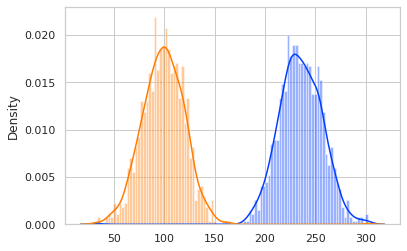

C1 [  1   0   0   0   0   1  69 432 415  82]
E1: [ 22.31695834  51.37670518  80.43645201 109.49619884 138.55594568
 167.61569251 196.67543934 225.73518618 254.79493301 283.85467985
 312.91442668]
C2: [ 68 429 431  68   3   0   0   0   0   1]
E2: [ 22.31695834  51.37670518  80.43645201 109.49619884 138.55594568
 167.61569251 196.67543934 225.73518618 254.79493301 283.85467985
 312.91442668]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 68 429 431  68   3   1  69 432 415  82]]
JACC: [[0.01470588 0.         0.         0.         0.         0.
  0.         0.         0.         0.01219512]]
JMEAN: 0.002690100430416069


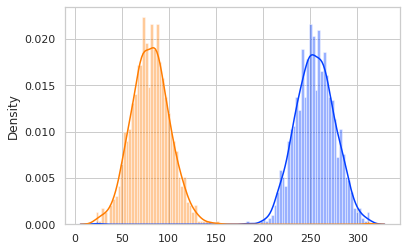

C1 [  1   0   0   0   0   0  49 477 443  30]
E1: [ -9.02855727  26.61886253  62.26628232  97.91370211 133.5611219
 169.20854169 204.85596148 240.50338128 276.15080107 311.79822086
 347.44564065]
C2: [ 47 507 418  27   0   0   0   0   0   1]
E2: [ -9.02855727  26.61886253  62.26628232  97.91370211 133.5611219
 169.20854169 204.85596148 240.50338128 276.15080107 311.79822086
 347.44564065]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 47 507 418  27   0   0  49 477 443  30]]
JACC: [[0.0212766  0.         0.         0.                nan        nan
  0.         0.         0.         0.03333333]]
JMEAN: 0.0068262411347517725


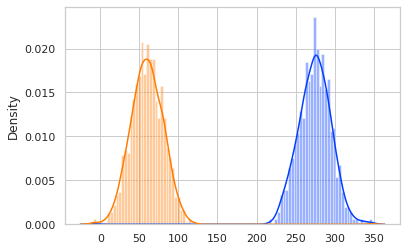

C1 [  1   0   0   0   0   0  15 351 581  52]
E1: [-18.94045315  19.48994103  57.9203352   96.35072938 134.78112355
 173.21151773 211.6419119  250.07230608 288.50270026 326.93309443
 365.36348861]
C2: [146 675 177   1   0   0   0   0   0   1]
E2: [-18.94045315  19.48994103  57.9203352   96.35072938 134.78112355
 173.21151773 211.6419119  250.07230608 288.50270026 326.93309443
 365.36348861]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[146 675 177   1   0   0  15 351 581  52]]
JACC: [[0.00684932 0.         0.         0.                nan        nan
  0.         0.         0.         0.01923077]]
JMEAN: 0.0032600105374077978


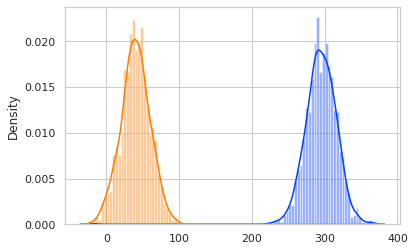

In [3]:
l = 300
coll = []
for f in range(35,300,20):
    value =  np.random.normal(loc=f,scale=20,size=1000)
    q1=value
    value =  np.random.normal(loc=l,scale=20,size=1000)
    q2=value
    q = np.concatenate([q1,q2])
    q1[-1] = q.max()
    q1[0] = q.min()
    q2[-1] = q.min()
    q2[0] = q.max()
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    count1, bin_edges1 = np.histogram(q1, bins=10)
    print('C1',count1)
    print('E1:',bin_edges1)
    count2, bin_edges2 = np.histogram(q2, bins=10)
    print('C2:',count2)
    print('E2:',bin_edges2)
    intersect =[]
    for i in range(count1.shape[0]):
        intersect.append(min(count1[i],count2[i]))
    intersect = np.array([intersect])
    print('INTERSECT:',intersect)
    union = []
    for i in range(count1.shape[0]):
        union.append(max(count1[i],count2[i]))
    union = np.array([union])
    print('UNION:',union)
    jacc = intersect / union
    print('JACC:',jacc)
    jacc = jacc[~np.isnan(jacc)]
    print('JMEAN:',jacc.mean())
    coll.append(jacc.mean())
    #sns.distplot(q)
    plt.show()
    l = l-20

In [4]:
jacc

array([0.00684932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01923077])

In [5]:
coll

[0.018944099378881987,
 0.0022231114668089455,
 0.0036785768129051714,
 0.05427442528735632,
 0.020530837583469165,
 0.06260354360472371,
 0.2474393856870655,
 0.4502396556947148,
 0.0824235143891942,
 0.0462404910253234,
 0.007448275862068965,
 0.002690100430416069,
 0.0068262411347517725,
 0.0032600105374077978]

In [6]:
qw = np.linspace(0,13,14)
qw

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

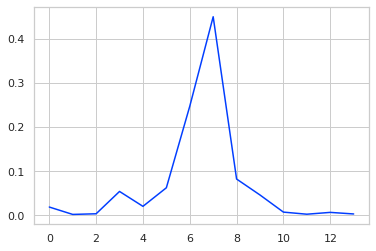

In [7]:
plt.plot(qw,coll)